In [1]:
from src.models.high_level_model import HighLevelModel
from src.data.multi_output_dataset import MultiOutputDataModule

import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt

In [2]:
GENDER_LABELS = [
    "Male",
    "Female"
]

RACE_LABELS = [
    "White",
    "Black",
    "Asian",
    "Indian",
    "Other"
]

UTKFACE_CLASSES = [len(GENDER_LABELS), len(RACE_LABELS)]

In [3]:
model = HighLevelModel.load_from_checkpoint(
    "models/utkface-high-level-model.ckpt",
    task_num_classes=UTKFACE_CLASSES,
    map_location="cpu",
)
model = model.eval()

data = MultiOutputDataModule(
    root_dir="data/UTKFace", batch_size=64, num_workers=0, task_num_classes=UTKFACE_CLASSES
)
data.setup()

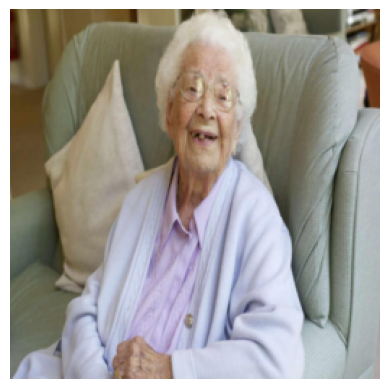

Predicted gender: Female - Ground Truth gender: Female
Predicted race: White - Ground Truth race: Black



In [4]:
for batch in data.val_dataloader():
    # Get the inputs
    x, y = batch[0], batch[1]

    # Forward pass
    with torch.no_grad():
        y_pred = model(x)

    # Plot the image
    plt.imshow(x[0].permute(1, 2, 0))
    plt.axis("off")
    plt.show()

    # Print the predicted and ground truth labels
    print(
        f"Predicted gender: {GENDER_LABELS[torch.argmax(y_pred[0][0]).item()]} - Ground Truth gender: {GENDER_LABELS[y[0][0].item()]}"
    )
    print(
        f"Predicted race: {RACE_LABELS[torch.argmax(y_pred[1][0]).item()]} - Ground Truth race: {RACE_LABELS[y[0][0].item()]}"
    )
    print()
    break

In [5]:
trainer = pl.Trainer(accelerator="gpu")
trainer.test(model, data)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/marcs/projects/.venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
You are using a CUDA device ('NVIDIA GeForce RTX 4060 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which w

Testing DataLoader 0: 100%|██████████| 57/57 [00:29<00:00,  1.96it/s]Task 0 Accuracy: 0.90
Task 0 F1 Score: 0.90
Task 0 Confusion Matrix:
[[1755  140]
 [ 235 1486]]
Task 1 Accuracy: 0.73
Task 1 F1 Score: 0.72
Task 1 Confusion Matrix:
[[1378   50   28   57    4]
 [  96  541   11   65   11]
 [ 140   33  299   54   12]
 [ 125   44   32  388   14]
 [  88   35   17   56   38]]
Overall Accuracy (Low-level): 0.66
Mean Task Accuracy (High-level): 0.81
Testing DataLoader 0: 100%|██████████| 57/57 [00:29<00:00,  1.96it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric         ┃        DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ test_accuracy (High-level) │     0.8137444853782654     │
│ test_accuracy (Low-level)  │     0.6592920422554016     │
│    test_task_0_accuracy    │     0.8962942361831665     │
│    test_task_0_conf_acc    │     0.8962942361831665     │
│       test_task_0_f1       │     0.8960904479026794     │
│    test_task_1_accuracy    │     0.7311946749687195     │
│    test_task_1_conf_acc    │     0.7311946749687195     │
│       test_task_1_f1       │     0.7152794599533081     │
└────────────────────────────┴────────────────────────────┘

[{'test_task_0_accuracy': 0.8962942361831665,
  'test_task_0_f1': 0.8960904479026794,
  'test_task_0_conf_acc': 0.8962942361831665,
  'test_task_1_accuracy': 0.7311946749687195,
  'test_task_1_f1': 0.7152794599533081,
  'test_task_1_conf_acc': 0.7311946749687195,
  'test_accuracy (Low-level)': 0.6592920422554016,
  'test_accuracy (High-level)': 0.8137444853782654}]